(400000, 12)
-0.0803663195
14.434345428514414
Optimization terminated successfully.
         Current function value: 0.296950
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:               200000
Model:                         Probit   Df Residuals:                   199998
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 May 2024   Pseudo R-squ.:                  0.5716
Time:                        17:18:29   Log-Likelihood:                -59390.
converged:                       True   LL-Null:                   -1.3863e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0153      0.004      3.701      0.000       0

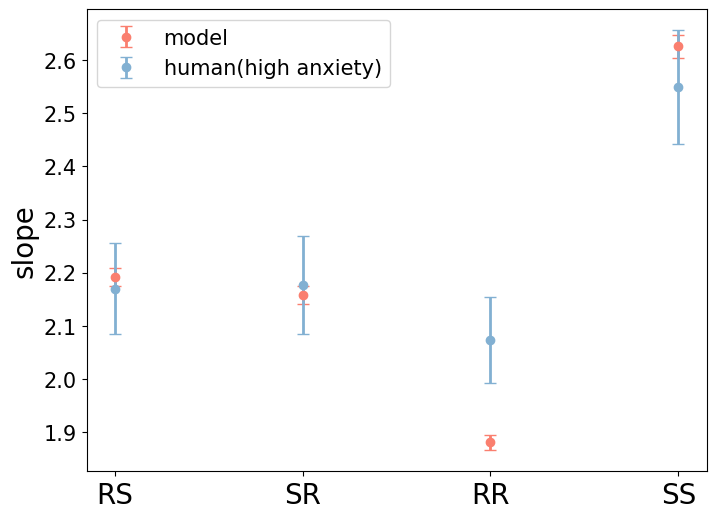

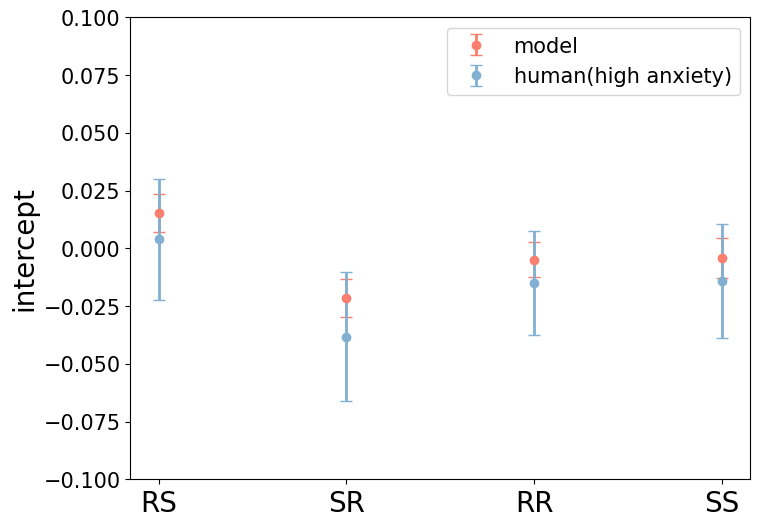

In [2]:

import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('default')
def standardization(data):
    data = np.array(data)
    mu = np.mean(data, axis=0)
    print(mu)
    sigma = np.std(data, axis=0)
    print(sigma)
    return (data ) / (sigma + 1e-9)


if __name__ == '__main__':

    conditions = ['RS','SR','RR','SS']
    const_list = []
    v_list = []
    std_const_list = []
    std_v_list = []

    for cond in conditions:
        Data = pd.read_csv(f'saved/analysed_2D_fan_'+cond+'high2.csv')
        print(Data.shape)
        Data['choice'] = Data['choice'] & 1
        Data = Data[Data.trial > 4]
        Data = Data[Data.trial < 15]
        C_list = Data['choice'].tolist()
        Y = C_list
        V_list = (Data['Q0']-Data['Q1']).tolist()
        V_list = standardization(V_list)
        X = np.array(V_list).T
        X = pd.DataFrame(X, columns=['V'])
        X = sm.add_constant(X)
        model = Probit(Y, X)
        probit_model = model.fit()
        const = probit_model.params['const']
        v = probit_model.params['V']
        std_const = probit_model.params['const'] - probit_model.conf_int()[0]['const']
        std_v = probit_model.params['V'] - probit_model.conf_int()[0]['V']
        const_list.append(const)
        v_list.append(v)
        std_const_list.append(std_const)
        std_v_list.append(std_v)
        print(probit_model.summary())


    fig, ax1 = plt.subplots(figsize = (8,6))
    # plt.ylim(1.8, 2.7)
    # plt.title('slope',size=16)
    ax1.errorbar(1, v_list[0], yerr=std_v_list[0], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4,label='model')
    ax1.errorbar(2, v_list[1], yerr=std_v_list[1], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(3, v_list[2], yerr=std_v_list[2], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(4, v_list[3], yerr=std_v_list[3], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)

    # from fan's data

    ax1.errorbar(1, 2.1702, yerr=0.08596, fmt="o", color='#82B0D2',elinewidth=2,capsize=4, label='human(high anxiety)')
    ax1.errorbar(2, 2.177, yerr=0.091346, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(3, 2.0738, yerr=0.080938, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(4, 2.5492, yerr=0.10639, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    plt.xticks([1, 2, 3, 4], ['RS', 'SR', 'RR', 'SS'])
    plt.xticks(size=20)
    plt.yticks(size=15)
    plt.legend(prop = {'size':15})
    plt.ylabel('slope', size=20)
    # plt.savefig('slope_2')
    plt.show()

    fig, ax1 = plt.subplots(figsize = (8,6))
    plt.ylim(-0.1, 0.1)
    # plt.title('intercept',size=16)
    ax1.errorbar(1, const_list[0], yerr=std_const_list[0], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4,label='model')
    ax1.errorbar(2, const_list[1], yerr=std_const_list[1], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(3, const_list[2], yerr=std_const_list[2], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    ax1.errorbar(4, const_list[3], yerr=std_const_list[3], fmt="o", color='#FA7F6F',elinewidth=2,capsize=4)
    plt.ylim(-0.1, 0.1)
    ax1.errorbar(1, 0.0039548, yerr=0.026212, fmt="o", color='#82B0D2',elinewidth=2,capsize=4, label='human(high anxiety)')
    ax1.errorbar(2, -0.038259, yerr=0.027847, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(3, -0.015113, yerr=0.022431, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    ax1.errorbar(4, -0.014029, yerr=0.024677, fmt="o", color='#82B0D2',elinewidth=2,capsize=4)
    plt.xticks([1, 2, 3, 4], ['RS', 'SR', 'RR', 'SS'])
    plt.legend(prop = {'size':15})
    plt.ylabel('intercept', size=20)
    plt.xticks(size=20)
    plt.yticks(size=15)
    # plt.savefig('intercept_2')
    plt.show()


